Confusion Matrix:
 [[67  0]
 [ 1 46]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        67
         1.0       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

ROC-AUC Score: 0.9987297554779295


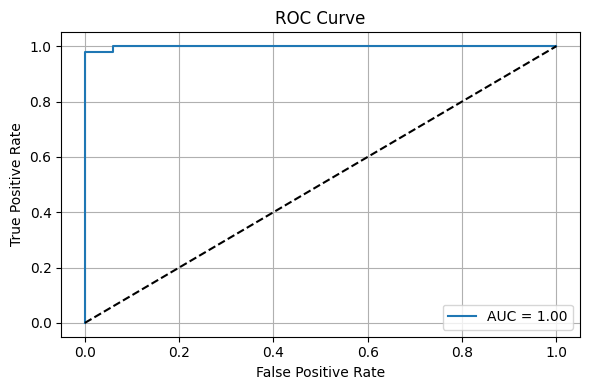

In [3]:
import pandas as pd
import numpy as np

# Step 1: Load Data
df = pd.read_csv('data.csv', header=None)

# Step 2: Assign column names
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(2, df.shape[1])]
df.columns = columns

# Step 3: Drop rows where diagnosis is NaN
df = df.dropna(subset=['diagnosis'])

# Step 4: Convert diagnosis to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 5: Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Step 6: Make features numeric and drop constant NaN columns
X = X.apply(pd.to_numeric, errors='coerce')  # Coerce non-numeric to NaN
X = X.dropna(axis=1, how='all')  # Drop columns where *all* values are NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN

# Step 7: Impute missing values
from sklearn.impute import SimpleImputer # Import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 8: Scale features
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 9: Train/test split
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ***Add this line to remove rows with NaN in y_train***
X_train = X_train[~np.isnan(y_train)]
y_train = y_train.dropna()
#--------------------------------------------------------

# Step 10: Train Logistic Regression
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Step 11: Evaluate
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve # Import necessary metrics
import matplotlib.pyplot as plt # Import matplotlib for plotting
import numpy as np

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()